[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Sarthakrw/micronets/blob/main/playground.ipynb)


In [1]:
!pip install micronets

In [2]:
from micronets.nn import DNN
from micronets.losses import mean_squared_error
from micronets.autograd_engine import Value

import matplotlib.pyplot as plt
import numpy as np

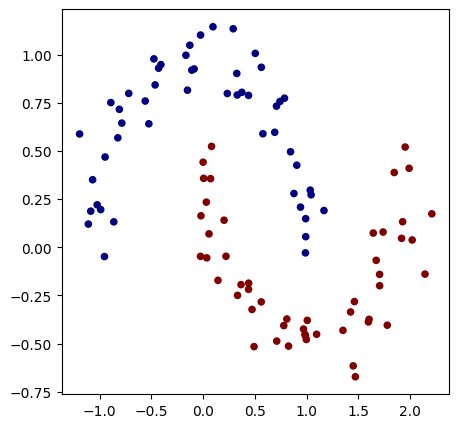

In [3]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
X.shape, y.shape

((100, 2), (100,))

In [5]:
model = DNN(input_features=2, layers=[5,5,1], activations=['relu', 'relu', 'tanh'])

In [6]:
history, graph = model.train(X=X, Y=y, iterations=300, loss_function=mean_squared_error, learning_rate=0.01)

In [7]:
history[:100]

[[1, 199.37894088305526],
 [2, 199.24362833790437],
 [3, 199.05088008203342],
 [4, 198.75968068778934],
 [5, 198.2837765236535],
 [6, 197.4079405802213],
 [7, 195.48761044039279],
 [8, 189.844048023568],
 [9, 159.38776472729592],
 [10, 107.05596452426917],
 [11, 167.78361061705897],
 [12, 119.2267466614545],
 [13, 57.5649058090359],
 [14, 69.54563005490621],
 [15, 98.17689635212234],
 [16, 67.45597931257917],
 [17, 61.51173057596854],
 [18, 57.31473040849692],
 [19, 50.469566026727904],
 [20, 36.21854364201256],
 [21, 33.80532172274507],
 [22, 37.46523308986293],
 [23, 55.08383471437509],
 [24, 34.94585419461197],
 [25, 38.77124575974786],
 [26, 63.56834063136157],
 [27, 42.25450665058471],
 [28, 27.410154107697444],
 [29, 25.376060733592073],
 [30, 40.43260804775857],
 [31, 19.6351584462012],
 [32, 16.557379777249512],
 [33, 19.529601301846082],
 [34, 33.19372514320419],
 [35, 85.11761867346027],
 [36, 70.12625402085875],
 [37, 50.7649459389168],
 [38, 39.91732341263808],
 [39, 23.974

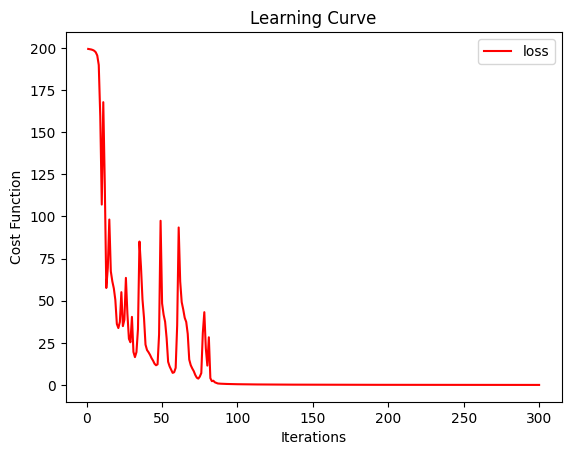

In [8]:
model.plot(history)

(-1.6724162690283584, 2.0775837309716416)

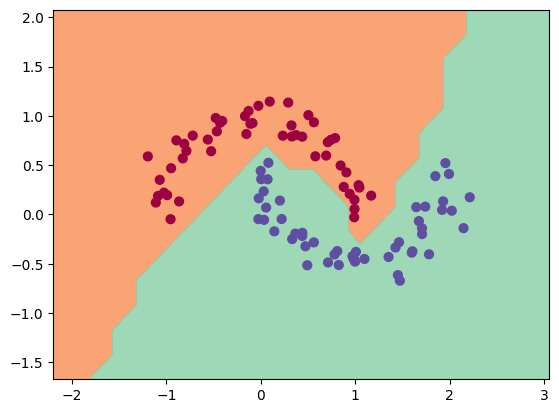

In [9]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())